In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=950 height=900></iframe>")

## Pandas

Library poroviding data structurs and data analysis tools.

Allows you to load and analyze data from different sources and output results in tables, and through visualization tools like bokeh. ALso, it allows you to develop models of your data. 

Pandas will allow us to be much more productive than using the standard Python data structures -- at least specifically for data wrandling, munging, transforming and modeling. 




There are two main datatypes in Pandas, Series and DataFrame. A series is a one dimensional data structure, while a dataFrame is a two dimensional data structure. 


## Series

The Series pandas datatype is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). 

Each elements of the series can be access through specifying an index.

The general pattern to initializing and naming a Series is :

```
s = pd.Series(data, index=index)
```

Where data can be a dictionary, tuple, list or scalar.  

### A few examples of creating and using Pandas Series

We can create a Series from tuples, lists and dictionaries:

In [2]:
import pandas as pd

names = ("First", "Second", "Third")
a = (1,2,3)
b = [4,5,6]
c = {"Seventh":7,'Eigth':8,"Ninth":9}

s1 = pd.Series(a, names)
s2 = pd.Series(b, names)
s3 = pd.Series(c, names)


In [3]:
s1

First     1
Second    2
Third     3
dtype: int64

In [4]:
s2

First     4
Second    5
Third     6
dtype: int64

In [5]:
s3

First    NaN
Second   NaN
Third    NaN
dtype: float64

... as we see above, dictionaries are a little different. Dictionaries already contain names for each element.

In [6]:
s3 = pd.Series(c) 
s3

Eigth      8
Ninth      9
Seventh    7
dtype: int64

...but, we must also remember that dictionaries, unlike tuples and lists, can't be expected to preserve their order. If data given to Series is a dict, an index will be constructed from the sorted keys of the dict (if this is applicable/possible).


If we're expected an ordered list, there are many ways of handling this. One way is to extract the dict data into a tuple and hand Series an explicit list of index names:

In [7]:
s4 = pd.Series(sorted(tuple(s3)), ["Seventh", "Eighth", "Ninth"]) 
s4

Seventh    7
Eighth     8
Ninth      9
dtype: int64

... now we see the data is nicely ordered.

### Series objects contain many useful methods

In [8]:
dir(s3)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul_

### Let's look at one of these, plot()


Pandas has a number of visualization methods (functions). To use these you will need to have matplotlib installed. 

Matplotlib now seems to install fine using standard pip install on windows (as mentioned in last class, this wasn't always the case, but on standard python 3 and windows 10 it now  seems to install fine)


Install matplotlib ....

```
pip install matplotlib
```


Let's look at the plot function...

In [9]:
dir(s3.plot)


['__bytes__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_constructor',
 '_dir_additions',
 '_dir_deletions',
 '_reset_cache',
 'area',
 'bar',
 'barh',
 'box',
 'density',
 'hist',
 'kde',
 'line',
 'pie']

NOTE: To have matplotlib visuals display within Jupyter, you need to include the tag `%matplotlib`

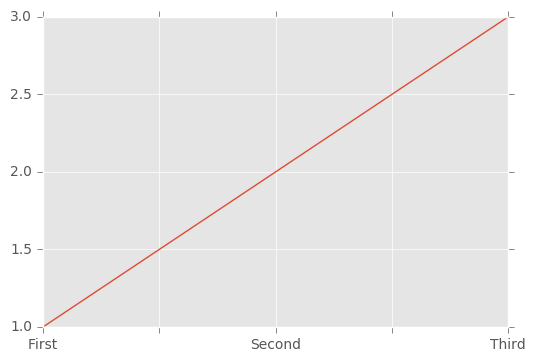

In [10]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
s1.plot()

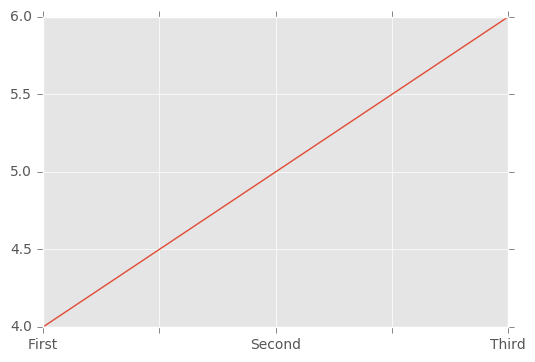

In [11]:
s2.plot()

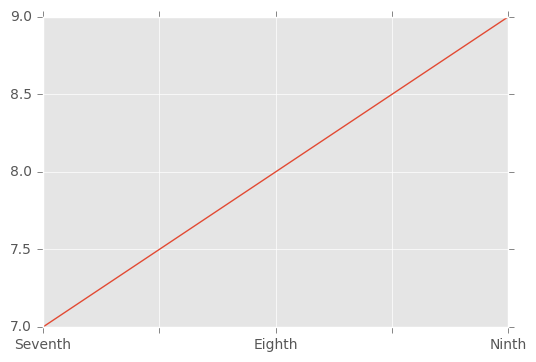

In [12]:
s4.plot()

### Yes, Series are very "dictionary-like"

In [13]:
s1["First"]

1

In [14]:
s1["Second"]

2

In [15]:
s1["Third"]

3

In [16]:
#s1["Forth"]

... and, as we see here, Series are subject to "out of bounds" errors is we attempt to access an element with an index that does not exist. 

Like in our use of dict, we can also try "getting" a value from a Series object:

In [17]:
print(s1.get("Forth"))

None


In [18]:
print(s1.get("Third"))

3


### Vectorized Operations with Pandas Series

In [19]:
s1 + s1

First     2
Second    4
Third     6
dtype: int64

In [20]:
s1 + 2

First     3
Second    4
Third     5
dtype: int64

In [21]:
s1 * 10

First     10
Second    20
Third     30
dtype: int64

We can even conduct operations of differing length Series:

In [22]:
s1[1:] + s1[2:]

Second    NaN
Third     6.0
dtype: float64

## DataFrames

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

<sub>(source: http://pandas.pydata.org/pandas-docs/stable/dsintro.html)</sub>

In [23]:
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}
d
   

{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [24]:
df = pd.DataFrame(d)
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [25]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [26]:
df['three']=df['one']*df['two']
df

,one,two,three
0,1.0,4.0,4.0
1,2.0,3.0,6.0
2,3.0,2.0,6.0
3,4.0,1.0,4.0


In [27]:
df['four']=[10,11,12,13]
df

,one,two,three,four
0,1.0,4.0,4.0,10
1,2.0,3.0,6.0,11
2,3.0,2.0,6.0,12
3,4.0,1.0,4.0,13


In [29]:
del df['one']
df

,two,three,four
0,4.0,4.0,10
1,3.0,6.0,11
2,2.0,6.0,12
3,1.0,4.0,13


In [30]:
print(df.pop('three'))
df

0    4.0
1    6.0
2    6.0
3    4.0
Name: three, dtype: float64


,two,four
0,4.0,10
1,3.0,11
2,2.0,12
3,1.0,13
